In [1]:
import pandas as pd

import numpy as np

import os,sys

from shapely.geometry import Point, Polygon

import copy

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score 

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import time


In [2]:
'''Load Data'''


Load_Path='./Data/Collection/'

DF=pd.read_csv(os.path.join(Load_Path,'DF.csv'))

DF=DF.drop(columns=['Unnamed: 0'])

DF=DF.fillna(0.0)



In [71]:
Silhouette={}

k_list=list(range(2,10,1))

for dt in [dt for dt in range(20161108,20161115,1)]:
    
    print('*'*50)
    
    print('Date: ',dt)
    
    
    Silhouette[dt]={}
    
    df=DF.loc[DF['date']==dt]
    
    X=np.array(df[['Total Number of Shifts',\
       'Average Order Number',\
       'Average Shift Duration (sec)',\
       'Average Occupied Time (sec)',\
       'First Shift Start Time',\
       'Average Occupied Distance (m)']])

    for k in k_list:

        print('+'*20)
        
        print('The number of clusters: ',k)

        clf = KMeans(n_clusters=k)
        clf.fit(X)
        Silhouette[dt][k]=silhouette_score(X,clf.labels_,metric='euclidean')

        print(Silhouette[dt][k])

    


**************************************************
Date:  20161108
++++++++++++++++++++
The number of clusters:  2
0.40994696140022996
++++++++++++++++++++
The number of clusters:  3
0.4224396375998361
++++++++++++++++++++
The number of clusters:  4
0.3945919564169306
++++++++++++++++++++
The number of clusters:  5
0.41555126421053823
++++++++++++++++++++
The number of clusters:  6
0.4060729168968346
++++++++++++++++++++
The number of clusters:  7
0.37936422329122965
++++++++++++++++++++
The number of clusters:  8
0.37597322585723725
++++++++++++++++++++
The number of clusters:  9
0.3600204326175912
**************************************************
Date:  20161109
++++++++++++++++++++
The number of clusters:  2
0.41095003550607123
++++++++++++++++++++
The number of clusters:  3
0.4222142811659139
++++++++++++++++++++
The number of clusters:  4
0.3946365313333453
++++++++++++++++++++
The number of clusters:  5
0.4188898049900209
++++++++++++++++++++
The number of clusters:  6
0.4101276

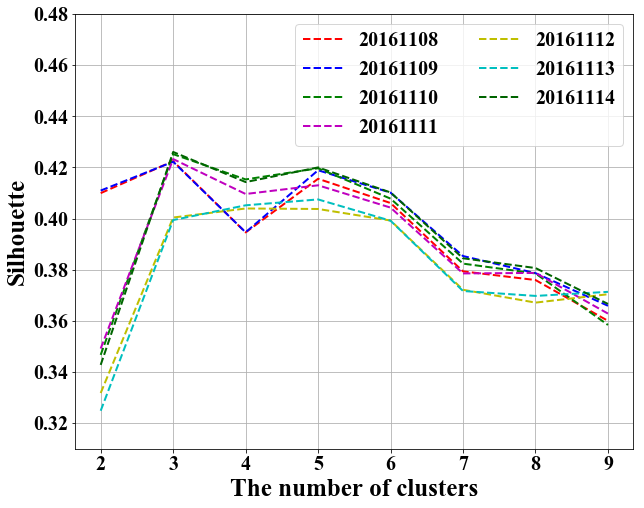

In [73]:
'''Silhouette score'''

figsize = 10,8

figure,ax1 = plt.subplots(figsize=figsize)

plt.tick_params(labelsize=20)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontname('Times New Roman') for label in labels]

font = {'weight' : 'normal',\
        'family' : 'Times New Roman',\
        'size': 25}

font_legend = {'weight' : 'normal',\
        'family' : 'Times New Roman',\
        'size': 20}
i=0

colors=['r','b','g','m','y','c','darkgreen']
for dt,value in Silhouette.items():
    
    clusters=list(value.keys())
    
    silhouette=list(value.values())
    
    ax1.plot(clusters,silhouette,color=colors[i],linestyle='--',linewidth=2,label=dt)
    
    i+=1
    


plt.grid()

ax1.set_xlabel('The number of clusters',font)

ax1.set_ylabel('Silhouette',font)

ax1.legend(loc='upper right',prop=font_legend,ncol=2)

xmajorLocator   = MultipleLocator(1)

ax1.xaxis.set_major_locator(xmajorLocator) 

ax1.set_ylim([0.31,0.48])


plt.show()

In [3]:
Get_10=lambda x:round(x/10.0,2)

Clustered_DF=pd.DataFrame([],columns=list(DF.columns.values)+['label'])

for dt in [dt for dt in range(20161101,20161115,1)]:
    
    print('*'*50)
    
    print('date: ',dt)
    
    df=copy.deepcopy(DF.loc[DF['date']==dt])
    
    df['Total Number of Shifts']=df['Total Number of Shifts'].astype('float')
    
    X=np.array(df[['Total Number of Shifts',\
       'Average Order Number',\
       'Average Shift Duration (sec)',\
       'Average Occupied Time (sec)',\
       'First Shift Start Time',\
       'Average Occupied Distance (m)']])
    
    clf = KMeans(n_clusters=3)

    clf.fit(X)

    df['label']=clf.labels_

    Labels=["1","2","3"]

    Get_label=lambda x:Labels[x]

    df['label']=df.apply(lambda x:Get_label(x['label']),axis=1)
    
    Stat=df.groupby('label').mean()

    Stat['First Shift Start Hour (10 hours)']=Stat.apply(lambda x:Get_10(x['First Shift Start Hour']),axis=1)

    Stat['label']=Stat.index
    
    Start_hour=list(Stat['First Shift Start Hour'])
    
    Tags={}
    
    for idx,row in Stat.iterrows():
        
        if row['First Shift Start Hour']==min(Start_hour):
            
            Tags[row['label']]='A'
            
        elif row['First Shift Start Hour']==max(Start_hour):
            
            Tags[row['label']]='B'
            
        else:
            
            Tags[row['label']]='C'
            
    df['label']=df.apply(lambda x:Tags[x['label']],axis=1)
            

    Clustered_DF=pd.concat([Clustered_DF,df],ignore_index=True)


Clustered_DF.to_csv(os.path.join(Load_Path,'Clustered_DF.csv'))

Clustered_DF



**************************************************
date:  20161101
**************************************************
date:  20161102
**************************************************
date:  20161103
**************************************************
date:  20161104
**************************************************
date:  20161105
**************************************************
date:  20161106
**************************************************
date:  20161107
**************************************************
date:  20161108
**************************************************
date:  20161109
**************************************************
date:  20161110
**************************************************
date:  20161111
**************************************************
date:  20161112
**************************************************
date:  20161113
**************************************************
date:  20161114


,Driver_id,Total Number of Shifts,Average Order Number,Average Shift Duration (sec),Average Occupied Time (sec),Average Shift Duration (Hour),Average Occupied Time (Hour),First Shift Start Time,First Shift Start Hour,Average Occupied Distance (m),Average Occupied Distance (km),Average Gap between orders (Hour),Average Gap between shifts (Hour),date,label
0,0000131d486b69eb77ab6e9e7cca9f4c,1.0,2.00,3119.0,1932.0,0.87,0.54,1477972625,11.95,13808.00,1380.80,0.33,0.00,20161101,A
1,000211a97ba2b768ef941593bf1ae1a5,2.0,2.00,3608.0,3154.0,1.00,0.88,1477963781,9.48,16056.33,1605.63,5.30,10.35,20161101,A
2,000770ada4aa5d856b5a766fb6bf7cf1,1.0,5.00,11649.0,5274.0,3.24,1.47,1477962292,9.07,31479.00,3147.90,0.44,0.00,20161101,A
3,0007a380800445346fff19afc4071ce3,1.0,1.00,1419.0,1419.0,0.39,0.39,1477963840,9.50,6544.00,654.40,0.00,0.00,20161101,A
4,0008c9d2ac91c00ef8b3ef80eba02a06,3.0,2.67,6323.0,2855.0,1.76,0.79,1477967006,10.38,20715.33,2071.53,1.62,4.23,20161101,A
5,00095da02ea38d4d8eaa120201e38ae9,1.0,1.00,1522.0,1522.0,0.42,0.42,1477965144,9.87,6060.00,606.00,0.00,0.00,20161101,A
6,000d0e4bd461b1f964daeb6d21868757,1.0,5.00,7148.0,5668.0,1.99,1.57,1477940181,2.93,58447.00,5844.70,3.28,0.00,20161101,C
7,000d7d7fe559c61e98d0a51e23e69bf7,2.0,3.50,8173.0,4854.0,2.27,1.35,1477966852,10.33,31157.50,3115.75,1.16,5.10,20161101,A
8,000db06fb2f4a700c4105348643f593e,1.0,1.00,1161.0,1161.0,0.32,0.32,1477968693,10.85,3255.00,325.50,0.00,0.00,20161101,A
9,000f63bea1c5b36b439d6fa60ee6cac7,2.0,5.50,8693.0,5495.0,2.41,1.53,1477967652,10.57,34297.00,3429.70,0.64,4.58,20161101,A


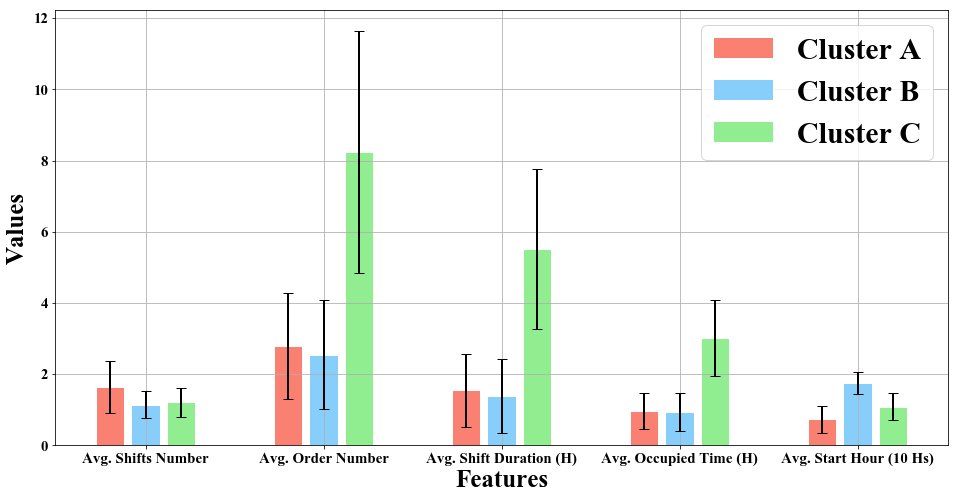

In [4]:
'''Statistics'''

Mean_Stat=Clustered_DF.groupby('label').mean()

Mean_Stat['First Shift Start Hour (10 hours)']=Mean_Stat.apply(lambda x:Get_10(x['First Shift Start Hour']),axis=1)

Mean_Stat['label']=Mean_Stat.index

Std_Stat=Clustered_DF.groupby('label').std()

Std_Stat['First Shift Start Hour (10 hours)']=Std_Stat.apply(lambda x:Get_10(x['First Shift Start Hour']),axis=1)

Std_Stat['label']=Std_Stat.index




figsize = 16,8
figure,ax1 = plt.subplots(figsize=figsize)

font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 15}
font_title = {'family' : 'Times New Roman','weight' : 'normal','size': 30}
font_legend = {'family' : 'Times New Roman','weight' : 'normal','size': 30}

plt.tick_params(labelsize=15)
labels = ax1.get_xticklabels() + ax1.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
font = {'family' : 'Times New Roman','weight' : 'normal','size': 25}

interval=[i for j in range(5) for i in range(10)]

coulmns=list(Mean_Stat[['Total Number of Shifts', 'Average Order Number','Average Shift Duration (Hour)',\
           'Average Occupied Time (Hour)','First Shift Start Hour (10 hours)']].columns)

Colors=['salmon','lightskyblue','lightgreen']

Features=['Avg. Shifts Number','Avg. Order Number','Avg. Shift Duration (H)','Avg. Occupied Time (H)','Avg. Start Hour (10 Hs)']

Labels=['A','B','C']

error_params=dict(elinewidth=2,ecolor='black',capsize=5)

for i in range(len(coulmns)):
    
    for j in range(len(Labels)):
        
        if i == len(coulmns)-1:
            
            ax1.bar(j+1+(i*5), Mean_Stat[coulmns[i]].iloc[j], \
                    label='Cluster '+ Labels[j],\
                    yerr=Std_Stat[coulmns[i]].iloc[j],\
                    error_kw=error_params,\
                    fc = Colors[j],\
                    width = 0.8,\
                    edgecolor='white')
            
        else:
            
            ax1.bar(j+1+(i*5), Mean_Stat[coulmns[i]].iloc[j],\
                    yerr=Std_Stat[coulmns[i]].iloc[j],\
                    error_kw=error_params,\
                    fc = Colors[j],\
                    width = 0.8,\
                    edgecolor='white')
            
            
    
    
ax1.set_xticks(np.linspace(2,22,5))
ax1.set_xticklabels(Features)

ax1.legend(loc="upper right",prop=font_legend,numpoints=3)

ax1.set_xlabel('Features',font)
ax1.set_ylabel('Values',font)

plt.grid()
plt.show()